In [1]:
# 데이터 분석을 위한 패키지
import numpy as np
import pandas as pd

In [2]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import FinanceDataReader as fdr

In [4]:
import koreanize_matplotlib

In [5]:
# 모든 컬럼,행을 출력하도록 설정
pd.set_option('display.max_columns', None) # None으로 설정하면 모든 컬럼 출력
pd.set_option('display.max_rows', None) #None으로 설정하면 모든 행 출력

In [6]:
kospi = fdr.StockListing('KOSPI')
kosdaq = fdr.StockListing('KOSDAQ')
etfs = fdr.StockListing('ETF/KR')

In [9]:
display(kospi.head(1))
display(kosdaq.head(1))
display(etfs.head(1))

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,54400,1,900,1.68,53700,54500,53600,11634677,629473076300,324756170720000,5969782550,STK


,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,196170,KR7196170005,알테오젠,KOSDAQ GLOBAL,기술성장기업부,296000,1,19000,6.86,280000,299500,275500,1769852,509107857000,15782373088000,53318828,KSQ


,Symbol,Category,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap
0,459580,6,KODEX CD금리액티브(합성),1057920,2,95,0.01,1057938.0,0.847,211396,223639,94381


In [12]:
kospi.shape

(961, 17)

In [11]:
# kospi의 변동성

# 수익률을 저장할 리스트
returns_list = []

# 각 종목의 데이터를 가져와 수익률 계산
for index, row in kospi.iterrows():
    ticker = row['Code']
    try:
        # 각 종목의 데이터 가져오기 (3개월)
        data = fdr.DataReader(ticker, start='2023-09-01')
        data['Returns'] = data['Close'].pct_change()  # 수익률 계산
        returns_list.append(data[['Returns']].rename(columns={'Returns': ticker}))  # 종목 코드로 열 이름 변경
    except Exception as e:
        print(f"{ticker} 데이터 오류: {e}")

# 모든 수익률 데이터프레임을 하나로 결합
daily_returns = pd.concat(returns_list, axis=1)

# KOSPI 전체 수익률 계산 (모든 종목의 평균 수익률)
kospi_average_returns = daily_returns.mean(axis=1)

# KOSPI 전체 변동성 계산 (표준편차)
kospi_volatility = kospi_average_returns.std() * 100  # 백분율로 변환

# 결과 출력
print(f"KOSPI 시장 전체의 3개월 변동성: {kospi_volatility:.2f}%")
  
  



KOSPI 시장 전체의 3개월 변동성: 0.97%


코스피종목을 각각 가져와서

각 코스피 종목마다 3개월간의 데이터를 가져와서

수익률을 계산 = 종가를 기반으로 pct_change() 사용

변동성 계산 : 수익률의 표준편차를 백분율로 변환

이렇게 계산한 변동성을 리스트에 각각 담음

이를 모든 종목에 수행

In [13]:

# 변동성을 저장할 리스트
volatility_list = []

# 각 종목의 데이터를 가져와 변동성 계산
for index, row in kospi.iterrows():
    ticker = row['Code']
    try:
        # 각 종목의 데이터 가져오기 (3개월)
        data = fdr.DataReader(ticker, start='2023-09-01')
        data['Returns'] = data['Close'].pct_change()  # 수익률 계산
        
        # 변동성 계산 (표준편차)
        volatility = data['Returns'].std() * 100  # 백분율로 변환
        volatility_list.append({'Code': ticker, 'Name': row['Name'], 'Volatility': volatility})
    except Exception as e:
        print(f"{ticker} 데이터 오류: {e}")

# 변동성 DataFrame 생성
volatility_df = pd.DataFrame(volatility_list)

# 변동성 상위 10개 종목 추출
top_volatility = volatility_df.nlargest(10, 'Volatility')

In [41]:
volatility_df.shape

(961, 3)

In [15]:
top_volatility.head()

,Code,Name,Volatility
954,009415,태영건설우,8.525376
913,084695,대상홀딩스우,7.917414
921,004835,덕성우,7.701029
330,475150,SK이터닉스,6.930281
922,003075,코오롱글로벌우,6.657879


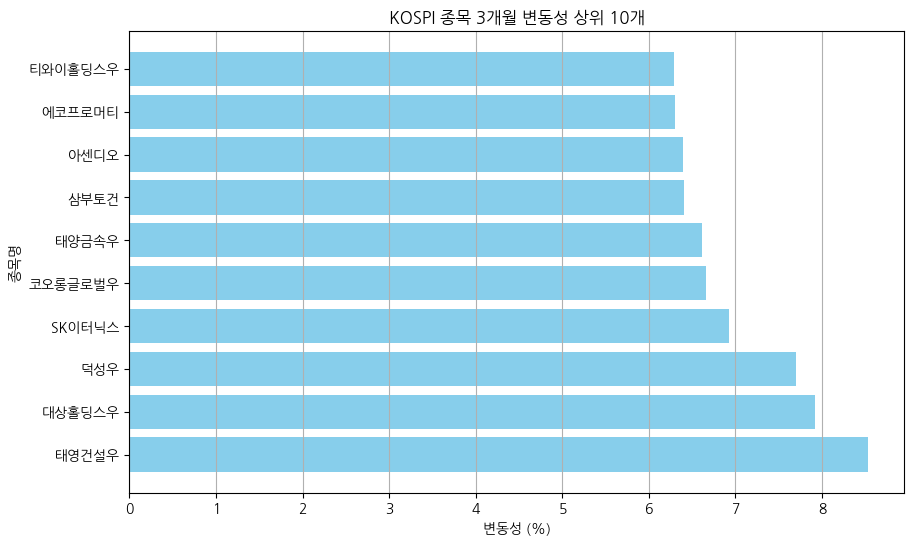

In [16]:
plt.figure(figsize=(10, 6))
plt.barh(top_volatility['Name'], top_volatility['Volatility'], color='skyblue')
plt.title('KOSPI 종목 3개월 변동성 상위 10개')
plt.xlabel('변동성 (%)')
plt.ylabel('종목명')
plt.grid(axis='x')
plt.show()

In [17]:

# 변동성을 저장할 리스트
volatility_list_kosdaq = []

# 각 종목의 데이터를 가져와 변동성 계산
for index, row in kosdaq.iterrows():
    ticker = row['Code']
    try:
        # 각 종목의 데이터 가져오기 (3개월)
        data_kosdaq = fdr.DataReader(ticker, start='2023-09-01')
        data_kosdaq['Returns'] = data_kosdaq['Close'].pct_change()  # 수익률 계산
        
        # 변동성 계산 (표준편차)
        volatility_kosadq = data_kosdaq['Returns'].std() * 100  # 백분율로 변환
        volatility_list_kosdaq.append({'Code': ticker, 'Name': row['Name'], 'Volatility': volatility_kosadq})
    except Exception as e:
        print(f"{ticker} 데이터 오류: {e}")

# 변동성 DataFrame 생성
volatility_kosdaq_df = pd.DataFrame(volatility_list_kosdaq)

# 변동성 상위 10개 종목 추출
top_volatility_kosdaq = volatility_kosdaq_df.nlargest(10, 'Volatility')

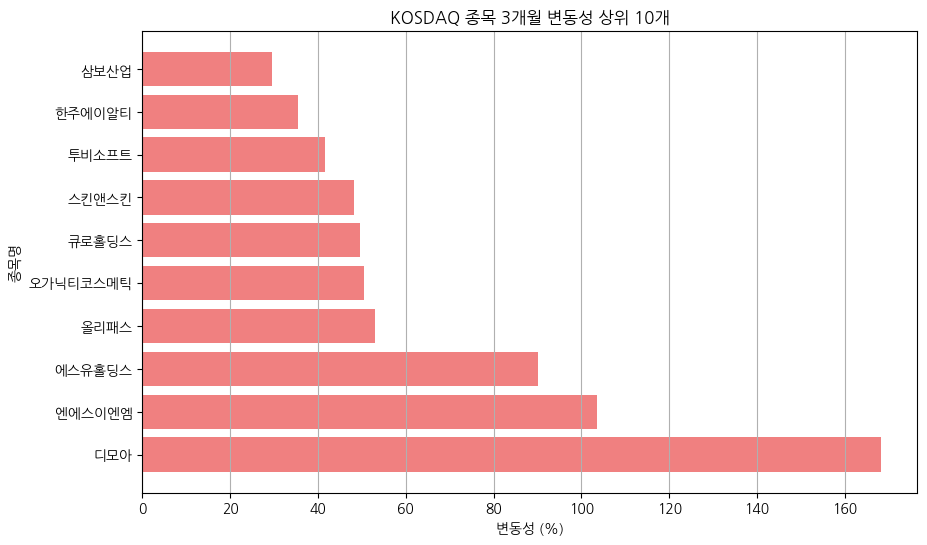

In [18]:
# KOSDAQ 변동성 시각화
plt.figure(figsize=(10, 6))
plt.barh(top_volatility_kosdaq['Name'], top_volatility_kosdaq['Volatility'], color='lightcoral')
plt.title('KOSDAQ 종목 3개월 변동성 상위 10개')
plt.xlabel('변동성 (%)')
plt.ylabel('종목명')
plt.grid(axis='x')
plt.show()

0000D0 데이터 오류: 404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v8/finance/chart/0000D0?period1=1693494000&period2=1735037230&interval=1d&includeAdjustedClose=true


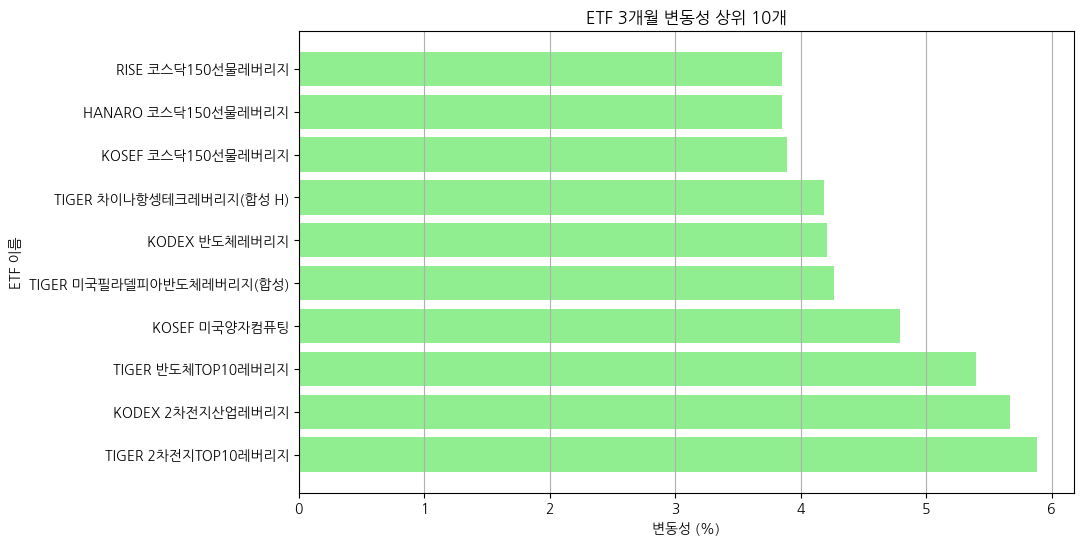

In [ ]:
# ETF 데이터 가져오기
etfs = fdr.StockListing('ETF/KR')

# 유효한 ETF 심볼 리스트
valid_etfs = etfs['Symbol'].tolist()

# 변동성을 저장할 리스트
volatility_list_etf = []

# 각 ETF의 데이터를 가져와 변동성 계산
for index, row in etfs.iterrows():
    ticker = row['Symbol']
    if ticker not in valid_etfs:
        print(f"{ticker}는 유효하지 않은 심볼입니다.")
        continue
    
    try:
        # 각 ETF의 데이터 가져오기 (3개월)
        data_etf = fdr.DataReader(ticker, start='2023-09-01')  # 원하는 시작일 설정
        data_etf['Returns'] = data_etf['Close'].pct_change()  # 수익률 계산
        
        # 변동성 계산 (표준편차)
        volatility_etf = data_etf['Returns'].std() * 100  # 백분율로 변환
        volatility_list_etf.append({'Symbol': ticker, 'Name': row['Name'], 'Volatility': volatility_etf})
    except Exception as e:
        print(f"{ticker} 데이터 오류: {e}")

# 변동성 DataFrame 생성
volatility_etf_df = pd.DataFrame(volatility_list_etf)

# 변동성 상위 10개 ETF 추출
top_volatility_etf = volatility_etf_df.nlargest(10, 'Volatility')

# ETF 변동성 시각화
plt.figure(figsize=(10, 6))
plt.barh(top_volatility_etf['Name'], top_volatility_etf['Volatility'], color='lightgreen')
plt.title('ETF 3개월 변동성 상위 10개')
plt.xlabel('변동성 (%)')
plt.ylabel('ETF 이름')
plt.grid(axis='x')
plt.show()

In [32]:
display(top_volatility_etf)
display(top_volatility)
display(top_volatility_kosdaq)

,Symbol,Name,Volatility
302,412570,TIGER 2차전지TOP10레버리지,5.881956
159,462330,KODEX 2차전지산업레버리지,5.671053
521,488080,TIGER 반도체TOP10레버리지,5.398382
359,498270,KOSEF 미국양자컴퓨팅,4.787874
128,423920,TIGER 미국필라델피아반도체레버리지(합성),4.267332
324,494310,KODEX 반도체레버리지,4.209316
438,438320,TIGER 차이나항셍테크레버리지(합성 H),4.186626
909,291630,KOSEF 코스닥150선물레버리지,3.888334
920,306530,HANARO 코스닥150선물레버리지,3.851652
305,278240,RISE 코스닥150선물레버리지,3.850506


,Code,Name,Volatility
954,009415,태영건설우,8.525376
913,084695,대상홀딩스우,7.917414
921,004835,덕성우,7.701029
330,475150,SK이터닉스,6.930281
922,003075,코오롱글로벌우,6.657879
920,004105,태양금속우,6.611612
471,001470,삼부토건,6.406033
839,012170,아센디오,6.398654
70,450080,에코프로머티,6.304681
940,36328K,티와이홀딩스우,6.289647


,Code,Name,Volatility
1666,016670,디모아,168.141831
856,078860,엔에스이엔엠,103.621145
1583,031860,에스유홀딩스,90.191054
1621,244460,올리패스,52.891171
1573,900300,오가닉티코스메틱,50.472472
1692,051780,큐로홀딩스,49.468652
1597,159910,스킨앤스킨,48.126158
1750,079970,투비소프트,41.622261
1504,058450,한주에이알티,35.458878
1364,009620,삼보산업,29.533348


In [37]:
top_volatility['Volatility'].mean()
top_volatility_kosdaq['Volatility'].mean()
top_volatility_etf['Volatility'].mean()

6.974260516180534

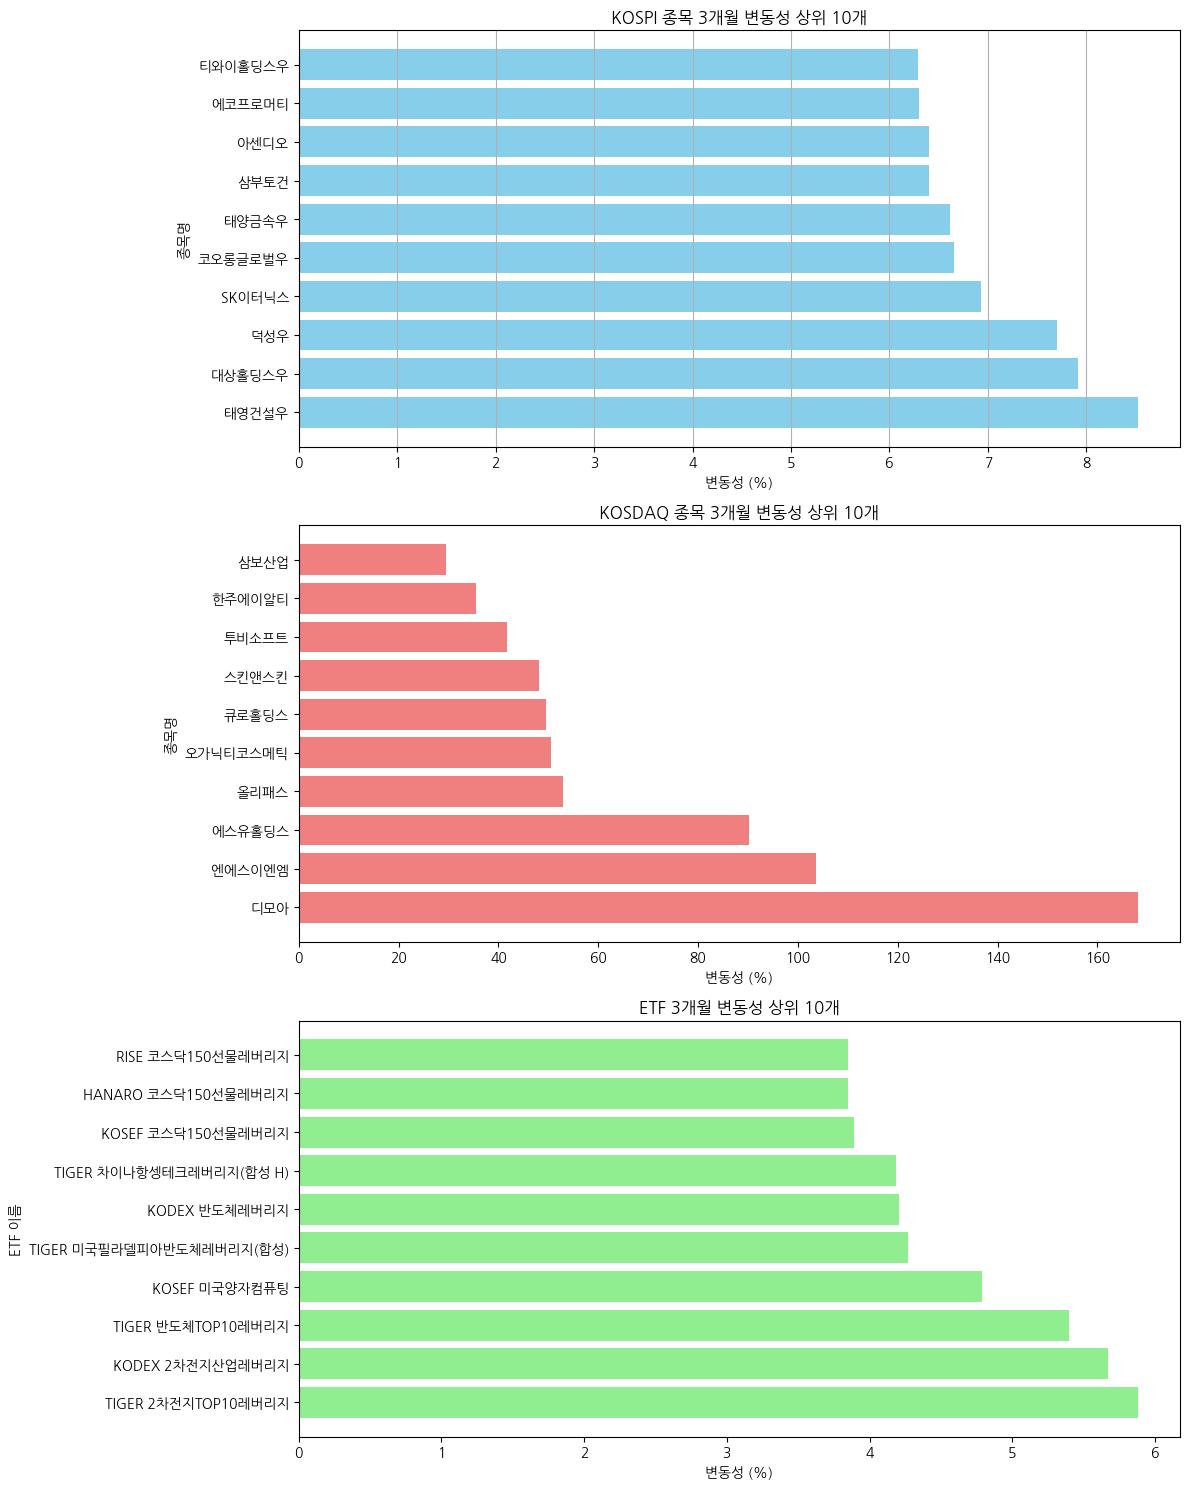

In [38]:
# KOSPI와 KOSDAQ, ETF변동성 시각화 비교
fig, axes = plt.subplots(3, 1, figsize=(12,15))

axes[0].barh(top_volatility['Name'], top_volatility['Volatility'], color='skyblue')
axes[0].set_title('KOSPI 종목 3개월 변동성 상위 10개')
axes[0].set_xlabel('변동성 (%)')
axes[0].set_ylabel('종목명')
axes[0].grid(axis='x')

axes[1].barh(top_volatility_kosdaq['Name'], top_volatility_kosdaq['Volatility'], color='lightcoral')
axes[1].set_title('KOSDAQ 종목 3개월 변동성 상위 10개')
axes[1].set_xlabel('변동성 (%)')
axes[1].set_ylabel('종목명')
axes[1].grid(axis='x')

axes[2].barh(top_volatility_etf['Name'], top_volatility_etf['Volatility'], color='lightgreen')
axes[2].set_title('ETF 3개월 변동성 상위 10개')
axes[2].set_xlabel('변동성 (%)')
axes[2].set_ylabel('ETF 이름')
axes[1].grid(axis='x')

plt.tight_layout()
plt.show()

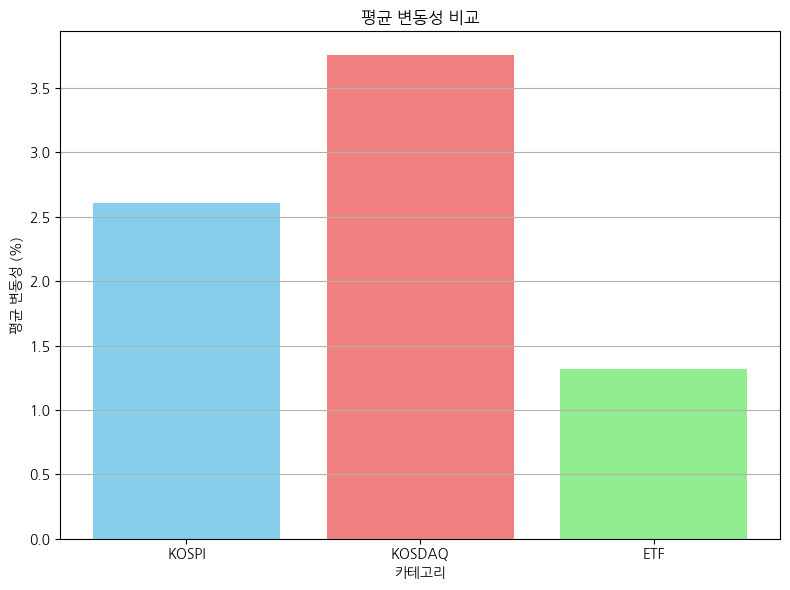

In [ ]:
# 전체 평균 변동성 계산
avg_volatility = {
    'KOSPI': volatility_df['Volatility'].mean(),
    'KOSDAQ': volatility_kosdaq_df['Volatility'].mean(),
    'ETF': volatility_etf_df['Volatility'].mean()
}

# 데이터프레임으로 변환
avg_volatility_df = pd.DataFrame(list(avg_volatility.items()), columns=['Category', 'Average Volatility'])

# 바 차트 그리기
plt.figure(figsize=(8, 6))
plt.bar(avg_volatility_df['Category'], avg_volatility_df['Average Volatility'], color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('평균 변동성 비교')
plt.xlabel('카테고리')
plt.ylabel('평균 변동성 (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

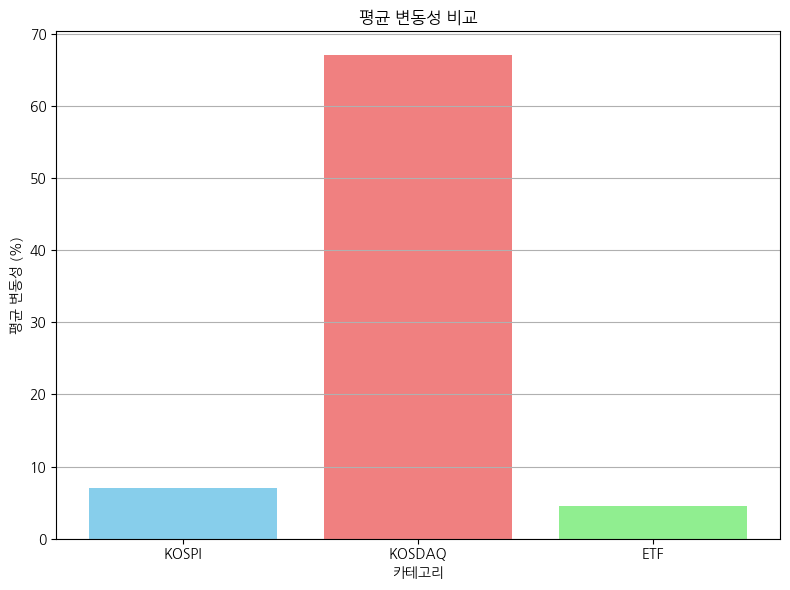

In [43]:
# 각 시장별 변동성 상위 10종목 평균 변동성 계산
avg_volatility = {
    'KOSPI': top_volatility['Volatility'].mean(),
    'KOSDAQ': top_volatility_kosdaq['Volatility'].mean(),
    'ETF': top_volatility_etf['Volatility'].mean()
}

# 데이터프레임으로 변환
avg_volatility_df = pd.DataFrame(list(avg_volatility.items()), columns=['Category', 'Average Volatility'])

# 바 차트 그리기
plt.figure(figsize=(8, 6))
plt.bar(avg_volatility_df['Category'], avg_volatility_df['Average Volatility'], color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('평균 변동성 비교')
plt.xlabel('카테고리')
plt.ylabel('평균 변동성 (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [40]:
avg_volatility_df

,Category,Average Volatility
0,KOSPI,6.974261
1,KOSDAQ,66.952697
2,ETF,4.599303


In [44]:
total_avg_volatility = {
    'KOSPI': volatility_df['Volatility'].mean(),
    'KOSDAQ': volatility_kosdaq_df['Volatility'].mean(),
    'ETF': volatility_etf_df['Volatility'].mean()
}

In [47]:
total_avg_volatility_df = pd.DataFrame(list(total_avg_volatility.items()), columns=['Category', 'Average Volatility'])
total_avg_volatility_df

,Category,Average Volatility
0,KOSPI,2.603482
1,KOSDAQ,3.751422
2,ETF,1.317060


In [ ]:
volatility_df.shape

1. 평균 변동성

    KOSPI: 평균 변동성이 6.97%로 상대적으로 낮은 편입니다. 이는 KOSPI에 포함된 대형주들이 안정적인 성향을 가지고 있음을 나타냅니다.
    KOSDAQ: 평균 변동성이 66.95%로 매우 높습니다. 이는 KOSDAQ이 주로 중소형주와 기술주로 구성되어 있어 시장의 변동성이 크고 위험도가 상대적으로 높다는 것을 의미합니다.
    ETF: 평균 변동성이 4.60%로 KOSPI보다 낮고 KOSDAQ보다 높습니다. 이는 ETF가 다양한 자산에 투자할 수 있지만, 특정 섹터나 주식에 대한 노출로 인해 변동성이 발생할 수 있음을 나타냅니다.

2. 시가총액

    KOSPI: 총 시가총액이 약 1,997조 원으로, KOSPI가 한국 주식 시장에서 가장 큰 규모를 자랑합니다. 대형 기업들이 중심이 되는 만큼 안정성과 신뢰성을 높이는 요소가 됩니다.
    KOSDAQ: 총 시가총액이 약 341조 원으로 KOSPI에 비해 상대적으로 작은 규모입니다. 이는 KOSDAQ이 중소형주 위주로 구성되어 있어 시장의 전체 규모가 작음을 나타냅니다.
    ETF: 총 시가총액이 약 1,723억 원으로, KOSPI와 KOSDAQ에 비해 매우 낮습니다. 이는 ETF의 종류가 제한적이거나 특정 자산에 집중되어 있을 가능성을 시사합니다.

3. 결론

    KOSPI는 안정성과 규모 면에서 우수한 성과를 보이고 있으며, 대형주 위주로 안정적인 투자처로 평가됩니다.
    KOSDAQ은 높은 변동성으로 인해 위험도가 크지만, 성장 가능성이 높은 중소형주에 투자하는 경향이 있어 투자자에게 더 큰 수익을 추구할 수 있는 기회를 제공합니다.
    ETF는 상대적으로 낮은 변동성과 작은 시가총액을 가지고 있어, 다양한 자산에 분산 투자할 수 있는 장점이 있지만, 특정 시장이나 섹터에 대한 노출로 인해 변동성이 발생할 수 있습니다.

KOSPI

    상위 10종목의 평균 변동성(6.97%)이 모든 종목의 평균 변동성(2.60%)보다 훨씬 높습니다. 이는 KOSPI 내에서 높은 변동성을 보이는 종목들이 존재하지만, 전체적으로는 안정적인 대형주들이 대부분을 차지하여 평균 변동성이 낮은 것을 나타냅니다. 즉, 특정 종목에서의 높은 변동성이 전체 시장에 큰 영향을 미치지 않는 구조입니다.

KOSDAQ

    상위 10종목의 평균 변동성(66.95%)이 모든 종목의 평균 변동성(3.75%)보다 매우 높습니다. 이는 KOSDAQ이 중소형주와 기술주 위주로 구성되어 있어, 상위 종목들이 극심한 변동성을 보이는 경향이 있음을 나타냅니다. 전체적으로 KOSDAQ 시장이 변동성이 큰 특성을 가지며, 이는 투자자에게 높은 리스크를 동반하는 동시에 높은 수익 가능성도 제공할 수 있습니다.

ETF

    상위 10종목의 평균 변동성(4.60%)은 모든 종목의 평균 변동성(1.32%)보다 높지만, KOSPI와 KOSDAQ에 비해 상대적으로 안정적인 편입니다. ETF는 다양한 자산에 분산 투자할 수 있는 장점이 있어, 변동성을 낮출 수 있는 효과가 있습니다. 그러나 특정 섹터나 주식에 대한 노출로 인해 변동성이 발생할 수 있습니다.

3. 종합적인 결론

    KOSPI는 안정적인 대형주로 구성되어 있어, 위험을 감수하지 않고도 안정적인 성장을 추구할 수 있는 투자처입니다.
    KOSDAQ은 높은 변동성으로 인해 투자 리스크가 크지만, 성장 가능성이 큰 중소형주에 투자하는 기회를 제공합니다.
    ETF는 비교적 낮은 변동성을 가지고 있어, 안정적인 투자 방법으로 고려될 수 있으며, 다양한 자산에 대한 분산 투자로 포트폴리오의 위험을 줄이는 데 도움이 됩니다.

1. KOSPI

    평균 변동성: 2.60%
    상위 변동성: 6.97%
    시가총액: 약 1,997조 원

추천 투자자 성향

    안정성을 추구하는 투자자: KOSPI는 평균 변동성이 낮아 상대적으로 안정적인 투자처로 평가됩니다. 대형주 중심의 포트폴리오로 구성되어 있어, 안정적인 수익을 원하는 투자자에게 적합합니다.

    장기 투자자: KOSPI의 대형주들은 안정적인 성장을 보여주므로, 장기적으로 자산을 늘리고자 하는 투자자에게 유리합니다.

    위험 회피 성향: 평균 변동성이 낮고, 상위 변동성이 존재하더라도 전체적으로 안정적인 성과를 기대할 수 있어, 리스크를 최소화하려는 투자자에게 적합합니다.

    배당 수익을 중시하는 투자자: KOSPI에 상장된 많은 기업들이 안정적인 배당금을 지급하므로, 정기적인 배당 수익을 기대하는 투자자에게 유리합니다.

2. KOSDAQ

    평균 변동성: 3.75%
    상위 변동성: 66.95%
    시가총액: 약 341조 원

추천 투자자 성향

    성장 가능성을 추구하는 투자자: KOSDAQ은 중소형주와 기술주 중심으로 구성되어 있어, 높은 성장 잠재력을 가진 기업에 투자하고자 하는 투자자에게 적합합니다.

    높은 변동성을 감수할 수 있는 투자자: 평균 변동성은 낮지만, 상위 변동성이 매우 높습니다. 이는 특정 종목에서 큰 수익을 추구할 수 있지만, 반대로 큰 손실도 감수해야 함을 의미합니다. 따라서 높은 리스크를 감수할 수 있는 투자자에게 추천합니다.

    단기 투자자: KOSDAQ의 높은 변동성은 단기적인 가격 변동을 활용하여 수익을 추구하는 투자자에게 유리합니다.

3. ETF

    평균 변동성: 1.32%
    상위 변동성: 4.60%
    시가총액: 약 1,723억 원

추천 투자자 성향

    분산 투자 선호 투자자: ETF는 다양한 자산에 분산 투자할 수 있는 장점이 있어, 리스크를 최소화하고자 하는 투자자에게 적합합니다. 평균 변동성이 낮아 안정적인 성향을 보입니다.

    특정 테마나 섹터에 투자하고자 하는 투자자: ETF를 통해 특정 지수나 자산군에 집중 투자할 수 있으며, 이는 특정 테마에 대한 노출을 원하는 투자자에게 유리합니다.

    장기 및 단기 모두 고려하는 투자자: ETF는 유동성이 높아 장기 투자뿐만 아니라 단기적인 가격 변동을 활용할 수 있어, 다양한 투자 전략을 구사할 수 있습니다.

결론

    KOSPI는 안정성과 장기적인 성장을 추구하는 투자자에게 추천됩니다.
    KOSDAQ은 높은 성장 가능성과 변동성을 감수할 수 있는 투자자에게 적합합니다.
    ETF는 다양한 자산에 분산 투자하고자 하며, 안정성을 추구하는 투자자에게 유리합니다.